In [5]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [6]:
# Создаем схему с тремя кубитами и тремя классическими битами
qc = QuantumCircuit(3, 3)

# Запутываем кубиты 1 и 2
qc.h(1)
qc.cx(1, 2)

# Кодируем состояние на кубите 0
qc.cx(0, 1)
qc.h(0)

# Измеряем кубиты 0 и 1
qc.measure([0, 1], [0, 1])

# Используем условные операции для передачи состояния на кубит 2
qc.cx(1, 2)
qc.cz(0, 2)

# Измеряем последний кубит
qc.measure(2, 2)

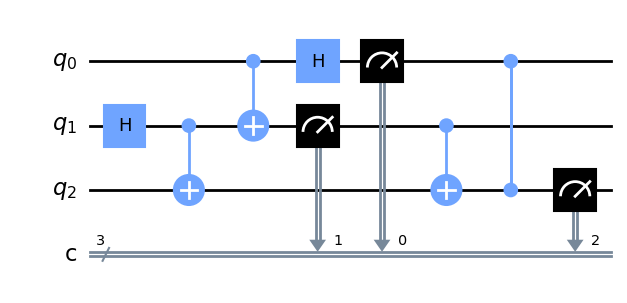

In [7]:
# Визуализируем квантовую схему
qc.draw("mpl")  # Отображаем схему в формате matplotlib

Результаты измерения для телепортации: {'011': 266, '001': 255, '010': 257, '000': 246}


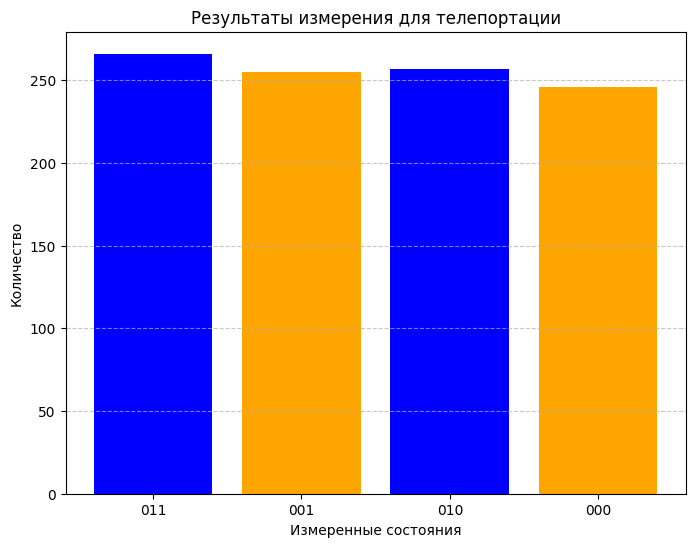

In [8]:
# Определяем симулятор
simulator = Aer.get_backend('qasm_simulator')

# Запускаем на симуляторе
job = execute(qc, simulator, shots=1024)
result = job.result()

# Получаем результаты измерений
counts = result.get_counts(qc)
labels = list(counts.keys())
values = list(counts.values())
print("Результаты измерения для телепортации:", counts)

# Визуализируем результаты
plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
plt.bar(labels, values, color=['blue', 'orange'])
plot_histogram(counts)  # Создаем гистограмму на основе полученных результатов
plt.title('Результаты измерения для телепортации')  # Заголовок графика
plt.xlabel('Измеренные состояния')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси Y
plt.show()  # Отображаем график
